# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here

import numpy as np
from functools import reduce
import statistics as stat
from scipy import stats as st
from collections import Counter
import pandas as pd

import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp=pd.read_csv(r'C:\Users\alexd\Ironhack\Labs\5.1-lab-subsetting-and-descriptive-stats\your-code\Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [5]:
# your answer here
temp_nyc=temp.query("State == 'New York'")
temp_nyc

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
np.array(temp_nyc.Temperature).mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp_above_15=temp.query("Temperature > 15")
temp_above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
temp_above_15_cities=temp.query("Temperature > 15")
temp_above_15_cities.City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp_between_15_20_cities=temp.query("`Temperature` > 15 and `Temperature` < 20")
temp_between_15_20_cities.City

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
temp.groupby('State').mean().Temperature

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [11]:
temp.groupby('State').std().Temperature

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
# your answer here
employee=pd.read_csv(r'C:\Users\alexd\Ironhack\Labs\5.1-lab-subsetting-and-descriptive-stats\your-code\Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

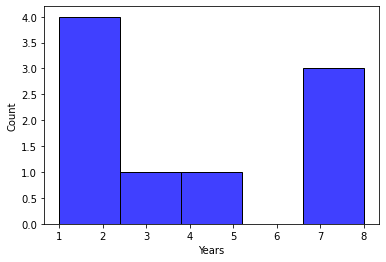

In [14]:
# your answer here

sns.histplot(x=employee.Years, color='b');

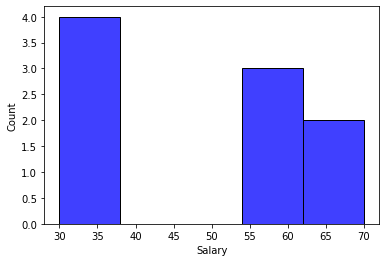

In [15]:
sns.histplot(x=employee.Salary, color='b');

In [16]:
# There are new employees that have been less tan two years in the company, also senior employees, and the company has people with experience

# There is a clear difference in salaries: entry level and higher salaries for senior and experience positions.

#### What's the average salary in this company?

In [17]:
# your answer here

np.array(employee.Salary).mean()

48.888888888888886

#### What's the highest salary?

In [18]:
# your answer here
max(employee.Salary)

70

#### What's the lowest salary?

In [19]:
# your answer here
min(employee.Salary)

30

#### Who are the employees with the lowest salary?

In [20]:
# your answer here
employees_with_lowest_salary=employee.query("`Salary` < 40")
employees_with_lowest_salary.Name

0     Jose
1    Maria
2    David
3    Sonia
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [21]:
# your answer here

David_info= employee.query("Name == 'David'")
David_info

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [22]:
# your answer here
David_info_salary= employee.query("Name == 'David'")
David_info_salary.Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [23]:
# your answer here

associate_info= employee.query("Title == 'associate'")
associate_info

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [24]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [25]:
# your answer here- 2nd method
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [26]:
# your answer here
associate_above_50_info= employee.query("`Title` == 'associate' and `Salary` > 55")
associate_above_50_info.Name

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [27]:
# your answer here
employee.groupby('Years').mean().Salary


Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [28]:
# your answer here

employee.groupby('Title').mean().Salary

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

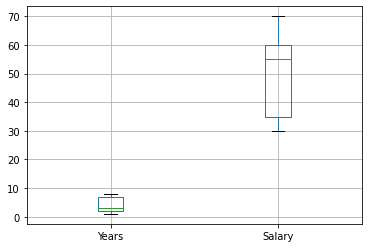

In [29]:
# draw boxplot here
employee.boxplot();

In [30]:
# print first quartile here
Years_q1=np.percentile(employee.Years, 25)
Salary_q1=np.percentile(employee.Salary, 25)

print(Years_q1, Salary_q1)


2.0 35.0


In [31]:
# print third quartile here
Years_q3=np.percentile(employee.Years, 75)
Salary_q3=np.percentile(employee.Salary, 75)
print(Years_q3, Salary_q3)

7.0 60.0


#### Is the mean salary per gender different?

In [32]:
# your answer here
employee.groupby('Gender').mean().Salary

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [33]:
# your answer here

numeric_info_by_Department = employee.groupby('Department') \
                            .agg(min_sal = ('Salary', 'min'), \
                                 mean_sal = ('Salary', 'mean'),
                                 max_sal = ('Salary', 'max'),
                                min_years = ('Years', 'min'), \
                                 mean_years = ('Years', 'mean'),
                                 max_years = ('Years', 'max'))
numeric_info_by_Department

,min_sal,mean_sal,max_sal,min_years,mean_years,max_years
Department,,,,,,
HR,30,45.00,70,2,4.666667,8
IT,30,48.75,70,1,4.500000,8
Sales,55,55.00,55,2,2.500000,3


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [34]:
# your answer here
new_df = pd.DataFrame(numeric_info_by_Department)
new_df
difference_max_min = new_df["max_sal"] - new_df["min_sal"]
new_df["dif_max_min"] = difference_max_min
print(new_df)

            min_sal  mean_sal  max_sal  min_years  mean_years  max_years  \
Department                                                                 
HR               30     45.00       70          2    4.666667          8   
IT               30     48.75       70          1    4.500000          8   
Sales            55     55.00       55          2    2.500000          3   

            dif_max_min  
Department               
HR                   40  
IT                   40  
Sales                 0  


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [35]:
import zipfile

In [36]:
# your answer here
zf = zipfile.ZipFile(r'C:\Users\alexd\Ironhack\Labs\5.1-lab-subsetting-and-descriptive-stats\your-code\Orders.zip')
orders = pd.read_csv(zf.open('Orders.csv'))
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [37]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [38]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


####  What is the average Purchase Price?

In [39]:
# your answer here

orders.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [40]:
# your answer here
max(orders.UnitPrice)

8142.75

In [41]:
# your answer here
min(orders.UnitPrice)

0.0

#### Select all the customers we have in Spain

In [42]:
# your answer here

customers_Spain=orders.query("Country == 'Spain'")
customers_Spain.CustomerID.value_counts()

12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12450      8
12547      8
12548      5
12445      4
Name: CustomerID, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [43]:
# your answer here
sum(customers_Spain.CustomerID.value_counts())

2485

#### Select all the customers who have bought more than 50 items ?

In [44]:
# your answer here
quantity_by_customerID=orders.groupby('CustomerID').sum().Quantity
quantity_by_customerID
new_df2 = pd.DataFrame(quantity_by_customerID)

In [45]:
customers_more_50_items = new_df2.loc[new_df2['Quantity'] > 50]
customers_more_50_items.head()

,Quantity
CustomerID,
12346,74215
12347,2458
12348,2341
12349,631
12350,197


#### Select orders from Spain that are above 50 items

In [46]:
# your answer here
orders_Spain_above_50= orders.query("`Country` == 'Spain'")
orders_Spain_above_50

orders_Spain_above_50_2=orders_Spain_above_50.groupby('InvoiceNo').sum().Quantity
orders_Spain_above_50_2

new_df3 = pd.DataFrame(orders_Spain_above_50_2)


orders_Spain_above_50_3 = new_df3.loc[new_df3['Quantity'] > 50]
orders_Spain_above_50_3.head()

,Quantity
InvoiceNo,
536944,400
538095,67
538525,300
539351,100
540469,630


#### Select all free orders

In [47]:
# your answer here

free_orders=orders.query("UnitPrice == 0")
free_orders.InvoiceNo.value_counts()

564651    4
540372    2
575579    2
574920    2
537197    1
574252    1
571035    1
572893    1
574138    1
574175    1
574879    1
574469    1
568384    1
577129    1
577168    1
577314    1
577696    1
569716    1
568158    1
539263    1
562973    1
561916    1
561669    1
561284    1
554037    1
553000    1
550188    1
548871    1
548318    1
547417    1
543599    1
541109    1
539722    1
578841    1
Name: InvoiceNo, dtype: int64

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [48]:
# your answer here
orders_lunch_bag = orders.Description.apply(lambda x: 'lunch bag' in x)
df1 = orders[orders_lunch_bag]
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [49]:
# your answer here
orders_lunch_bag_made_before_2011=df1.query("year == 2011")
orders_lunch_bag_made_before_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

In [50]:
# your answer here



#### Select all orders made in the month of August

In [51]:
# your answer here
orders_made_August= orders.query("`month` == 8")
orders_made_August.head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [52]:
new_df4 = pd.DataFrame(orders_made_August)
new_df4


orders_by_countries_August = new_df4.groupby('Country') \
                            .agg( orders_count= ('InvoiceNo', 'count'))
orders_by_countries_August

,orders_count
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [53]:
# your answer here

average_amount_spent_by_country = orders.groupby('Country') \
                            .agg( average_amount_spent= ('amount_spent', 'mean'))

average_amount_spent_by_country

,average_amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [54]:
# your answer here
most_expensive_item = orders.query("`UnitPrice` == 8142.750000")
most_expensive_item.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [55]:
# your answer here
average_amount_spent_by_year = orders.groupby('year') \
                            .agg( average_amount_spent= ('amount_spent', 'mean'))

average_amount_spent_by_year

,average_amount_spent
year,
2010,21.892733
2011,22.430074
